# DSCI 100 Project - Section 6 Group 16 
# Minecraft project report 
## members:

|Name|Student Number|
|--------|---------|
|Clement Cheung|40162752|
|Eileen Limneus|81033300|
|Min Hyung Yoo|26944660|
|Tyler Lee|12253688|


### Project Objectives!
+ **Broad Question:** (1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

+ **Specific Question:** How does a player's tendency to revisit the PLAICraft server, and their total playtime affect their subscription status to a game-related newsletter?

In [1]:
# loading the 

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

+ relevant background information on the topic enough so that somoneone that is unfamiliar on it can understand the full report.
+ clearly state the question you tried to answer with your project
+ identify and fully describe the dataset that was used to answer the question

## Methods & Results

* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
* your report should include code which:
    - loads data 
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis
 
note: all figures should have a figure number and a legend

#### reading the data

In [2]:
session_data <- read_csv("sessions.csv")
players_data <- read_csv("players.csv")
session_data
players_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### processing session_data and merging the two dataframes

In [3]:
session_data <- session_data |> 
group_by(hashedEmail) |>
summarise(count = n()) |>
arrange(-count)
session_data

hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


In [4]:
final_data <- full_join(session_data, players_data, by = "hashedEmail")
final_data

hashedEmail,count,experience,subscribe,played_hours,name,gender,Age
<chr>,<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,TRUE,56.1,Dana,Male,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,Regular,TRUE,223.1,Hiroshi,Male,17
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,Amateur,TRUE,150.0,Delara,Female,16
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,NA,Amateur,FALSE,0,Orion,Male,17
644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,NA,Amateur,TRUE,0,Rhys,Male,20
b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,NA,Amateur,TRUE,0,Bailey,Female,17


#### simple visualisation to get started

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


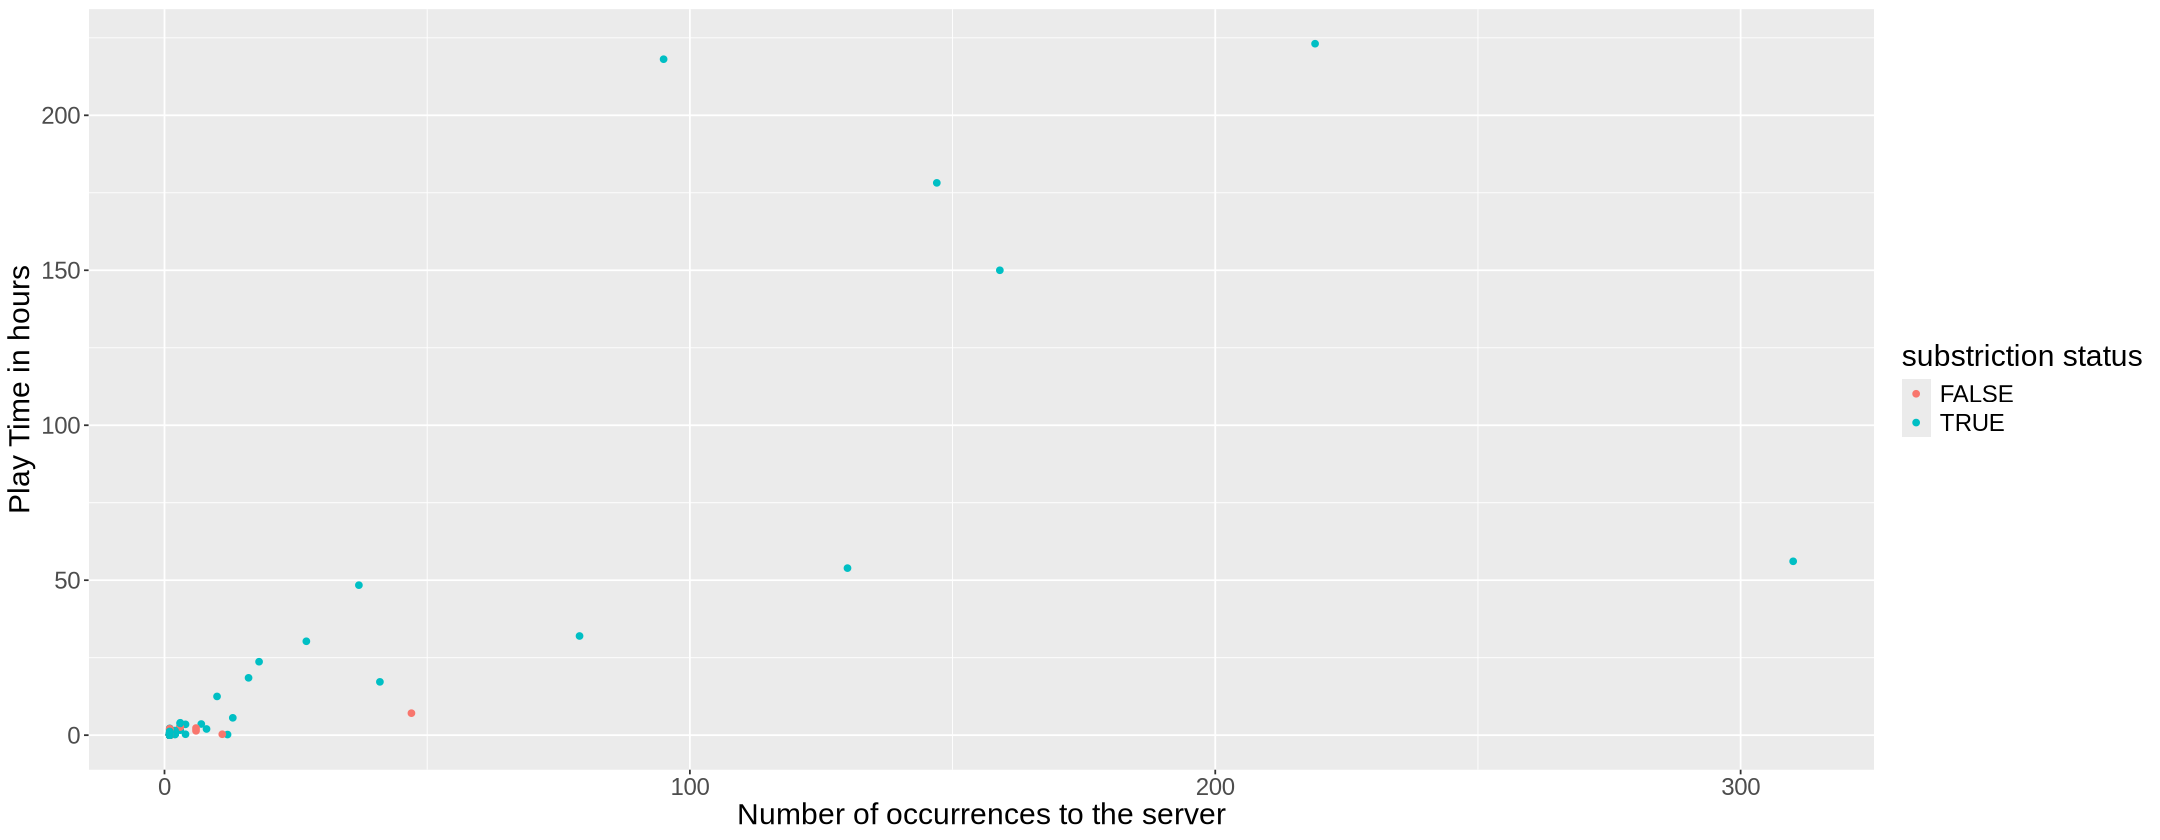

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


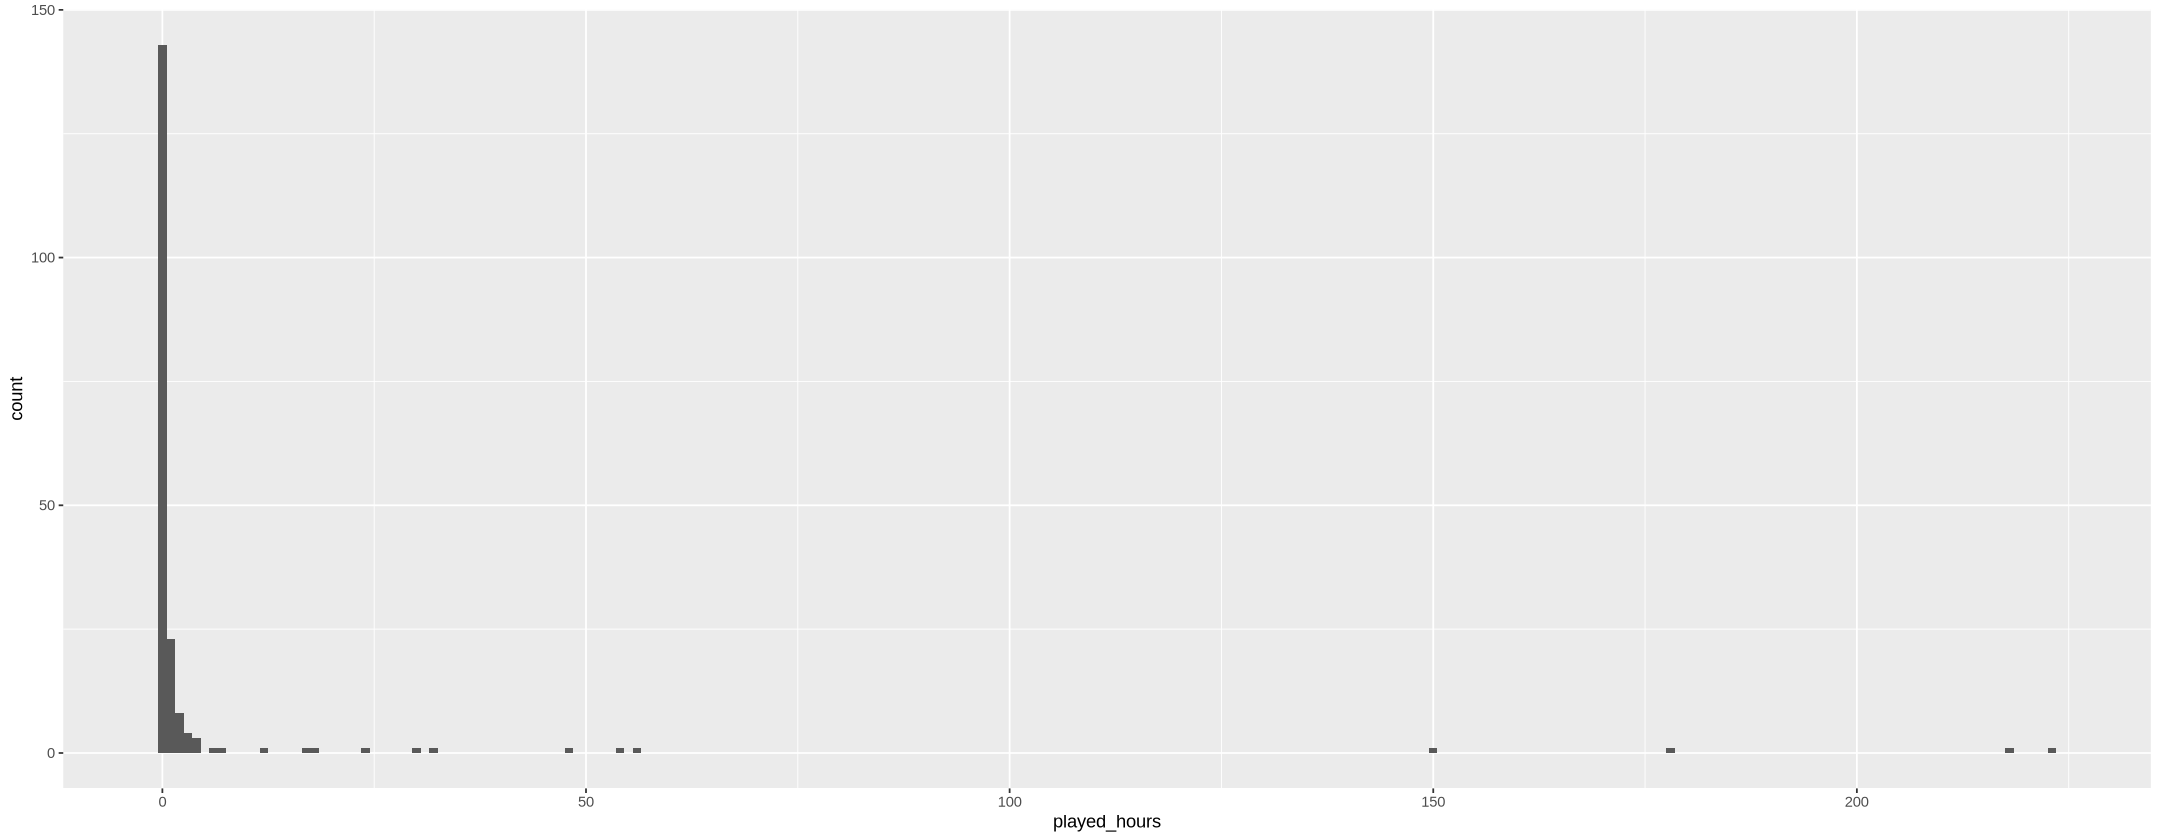

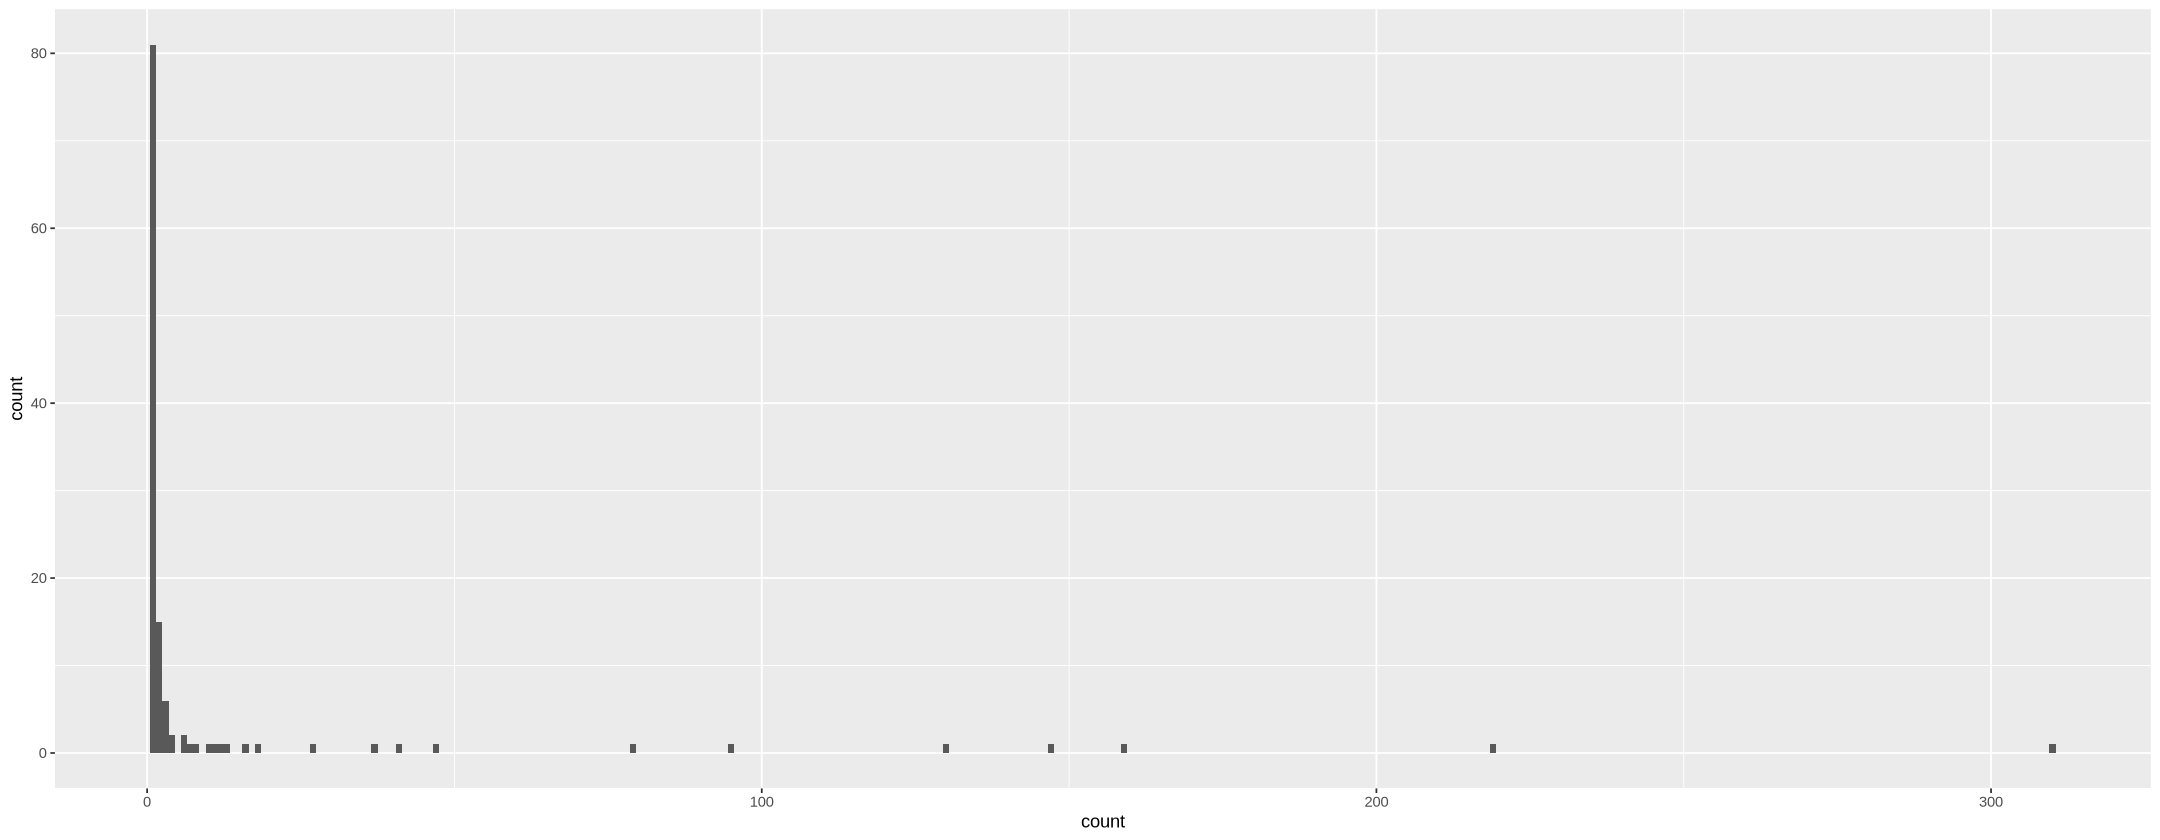

In [30]:
options(repr.plot.width = 18, repr.plot.height = 7)

final_data |>  
    ggplot(aes(x = count, y = played_hours, color = subscribe)) + 
    geom_point() + 
    xlab("Number of occurrences to the server") +
    ylab("Play Time in hours") +
    labs(color = "substriction status") +
    theme(text = element_text(size = 18))

hours_dist <- ggplot(final_data, aes(x = played_hours)) +
    geom_histogram(binwidth = 1)
occurence_dist <- ggplot(final_data, aes(x = count)) +
    geom_histogram(binwidth = 1)

hours_dist
occurence_dist

#### At this point...
Given the plot above, it's difficult to draw any conclusions on trends and patterns due to the various outliers skewing distribution. Performing a 95% confidence interval allows us to dismiss outliers and hone in on a clearer range.

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


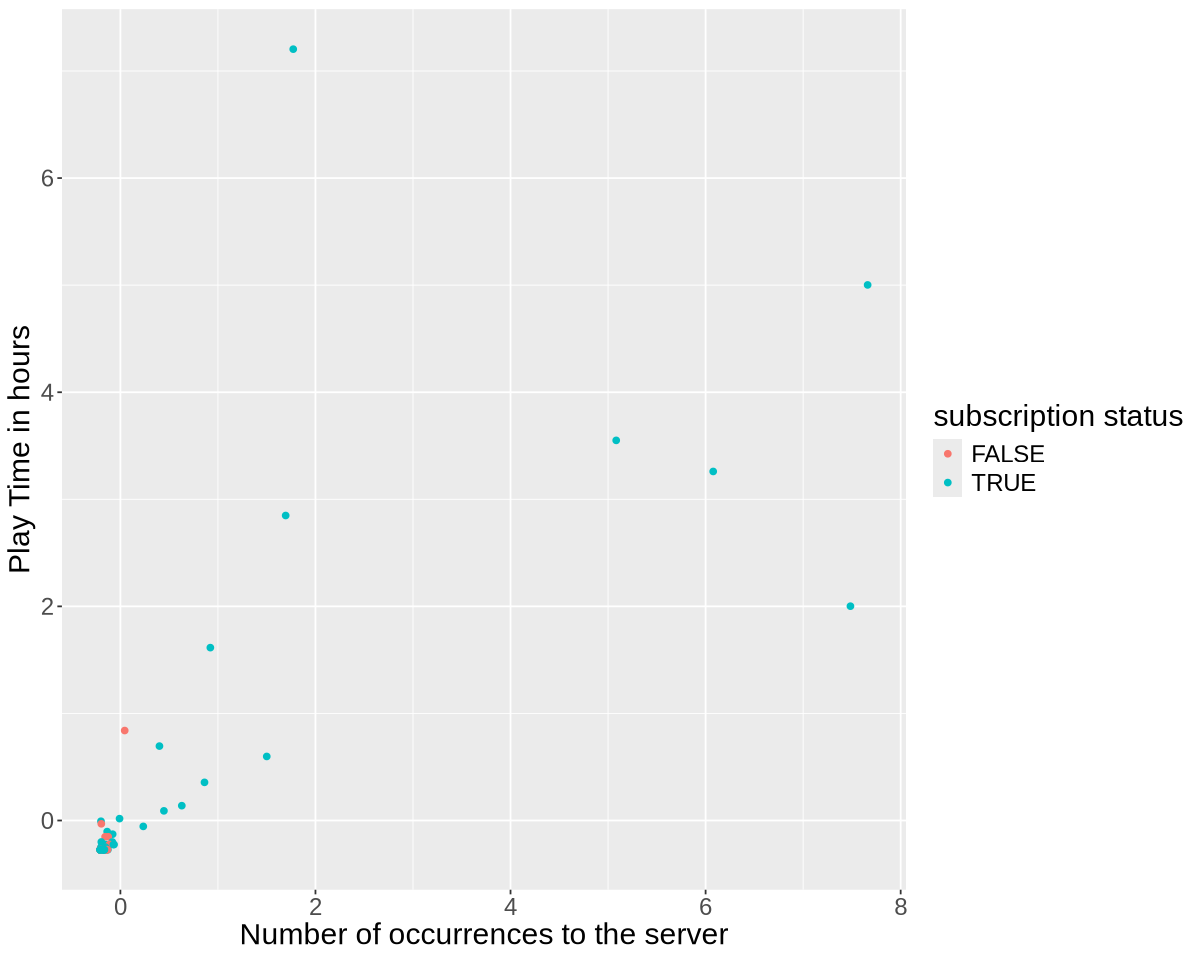

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8)

# the stuff below is me normalising the data, then plotting it. plotting the data still had a weird bias towards the observations too far
# im gonna follow up this cell (and its print) with some experiments with 95% confidence interval, hopefully it provides a smaller range.

subscription_class_data <- final_data |>
    mutate(subscription_status = as_factor(subscribe)) |>
    select(subscription_status, played_hours, count)

normalise_recipe <- subscription_class_data |>
    recipe(subscription_status ~ played_hours + count) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()
normalised_data <- bake(normalise_recipe, subscription_class_data)

normalised_plot <- ggplot(normalised_data, aes(x = played_hours, y = count, colour = subscription_status)) +
    geom_point() +
    xlab("Number of occurrences to the server") +
    ylab("Play Time in hours") +
    labs(color = "subscription status") +
    theme(text = element_text(size = 18))
normalised_plot

In [13]:
# trying out 95% confidence now.
#two ways: 1) t-test, 2) quartiles (the next code cell)

t_test_occurences <- t.test(final_data$count, conf.level = 0.95)
print(t_test_occurences$conf.int)

t_test_hours <- t.test(final_data$played_hours, conf.level = 0.95)
print(t_test_hours$conf.int)

[1]  4.963808 19.596192
attr(,"conf.level")
[1] 0.95
[1] 1.851171 9.840666
attr(,"conf.level")
[1] 0.95


In [18]:
# the resulting output is the 95% confidence range for where the true population mean resides
# it's therefore reasonable to estimate most players visit beteen 4.964 and 19.596 times, accumulating between 1.812 and 9.841 hours.

#im also going to do the way kinda taught in class, by using quantiles and finding the 2.5th and 97.5th percentiles

lower_bound_occurences <- quantile(final_data$count, probs = 0.025, na.rm = TRUE)
upper_bound_occurences <- quantile(final_data$count, probs = 0.975, na.rm = TRUE)

lower_bound_hours <- quantile(final_data$played_hours, probs = 0.025, na.rm = TRUE)
upper_bound_hours <- quantile(final_data$played_hours, probs = 0.975, na.rm = TRUE)

print(c(lower_bound_occurences, upper_bound_occurences))
print(c(lower_bound_hours, upper_bound_hours))

#the resulting bounds take account for ALL the data, so it includes the yucky outliers. I'm more partial to the t_test results

 2.5% 97.5% 
  1.0 145.3 
  2.5%  97.5% 
 0.000 54.175 


played_hours,count,subscribe
<dbl>,<int>,<lgl>
53.9,130,TRUE
32.0,79,TRUE
7.1,47,FALSE
⋮,⋮,⋮
1.2,1,TRUE
0.1,1,TRUE
1.1,1,TRUE


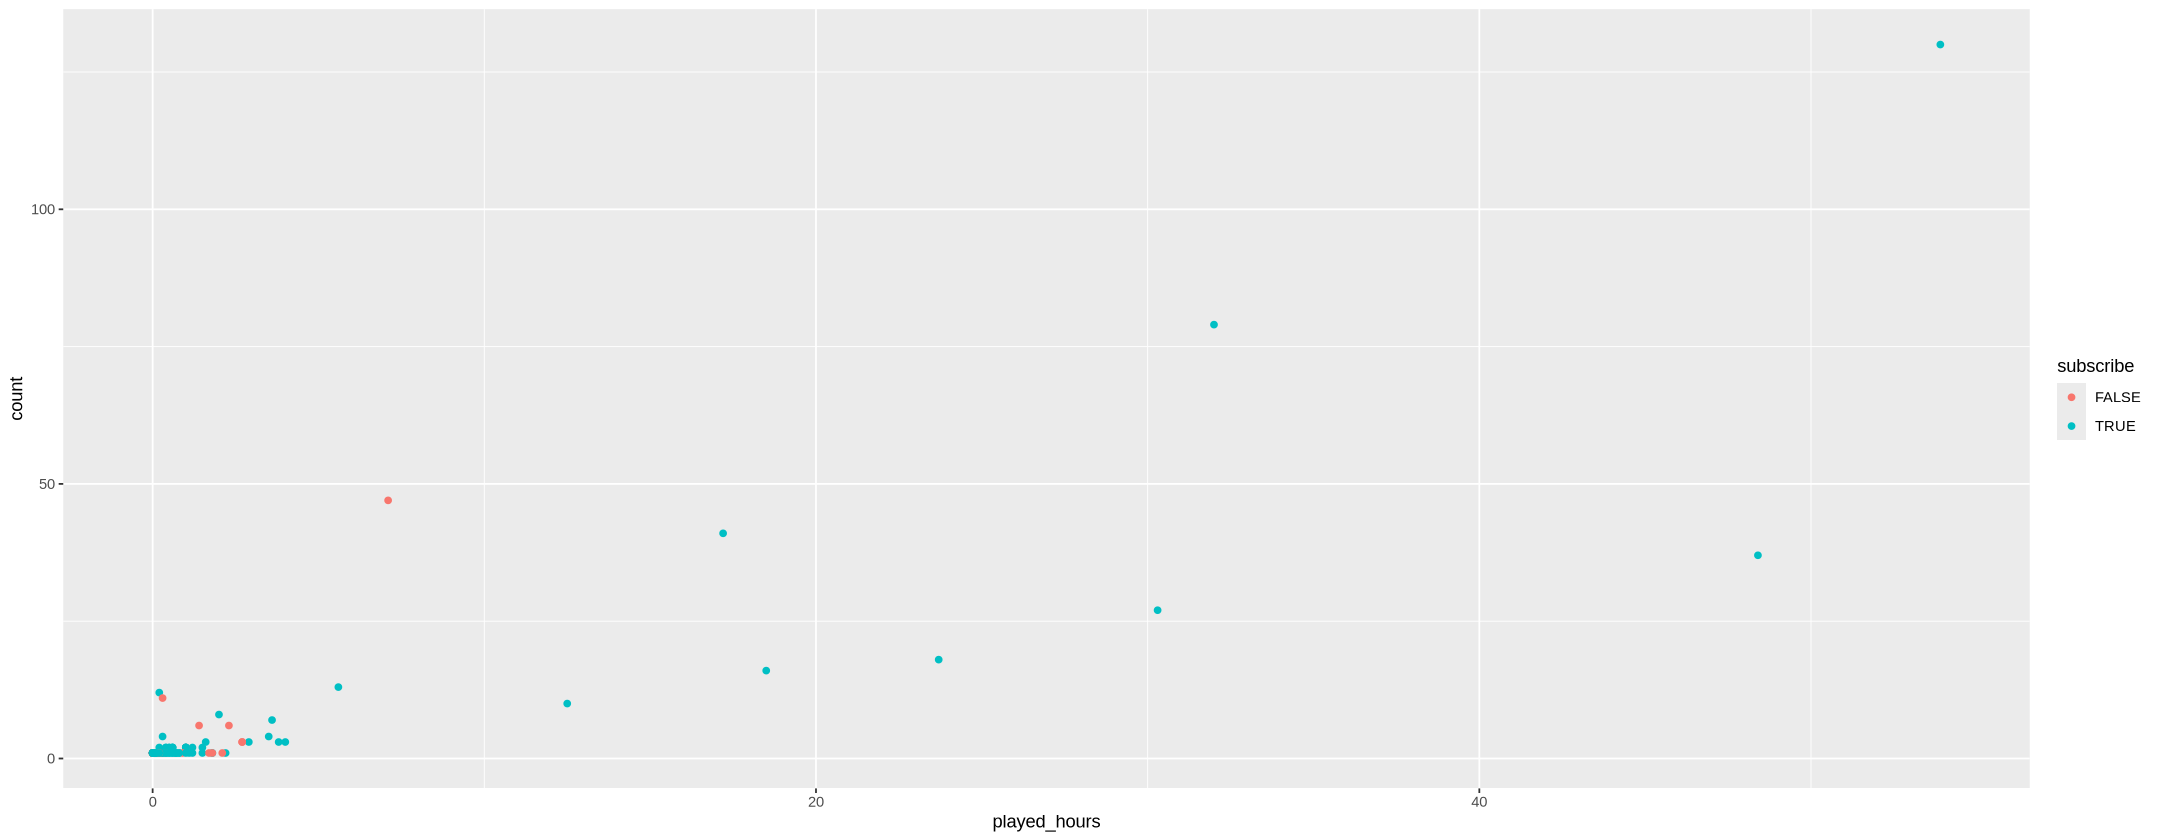

In [38]:
# knowing this we can make some new code that focuses on the range identified by the t-test

filtered_data <- final_data |>
    select(played_hours, count, subscribe) |>
    filter(1.0 <= count & count <= 145.3, 0 <= played_hours & played_hours <= 54.175)
filtered_data

# I'm commenting a version of the filtering that yields a better looking plot, its based on the upper bounds identified in the t-test

# filtered_data_draft <- final_data |>
#     select(played_hours, count, subscribe) |>
#     filter(count <= 19.596192, played_hours <= 9.840666)
# filtered_data_draft
# filtered_data_d_plot <- ggplot(filtered_data_draft, aes(x = played_hours, y = count, colour = subscribe)) +
#     geom_point() 
# filtered_data_d_plot

# if you plot the commented version, you can see how a lot of the data points are people with only one visit, and varying hours in that one sessions.
# i don't know what to make of this, but i'll try filtering out the one time visiters. we can maybe consider changing our question to focus on recurring players.

filtered_plot <- ggplot(filtered_data, aes(x = played_hours, y = count, colour = subscribe)) +
    geom_point() 
filtered_plot

played_hours,count,subscribe
<dbl>,<int>,<lgl>
56.1,310,TRUE
223.1,219,TRUE
150.0,159,TRUE
⋮,⋮,⋮
0.6,2,TRUE
0.6,2,TRUE
1.0,2,TRUE


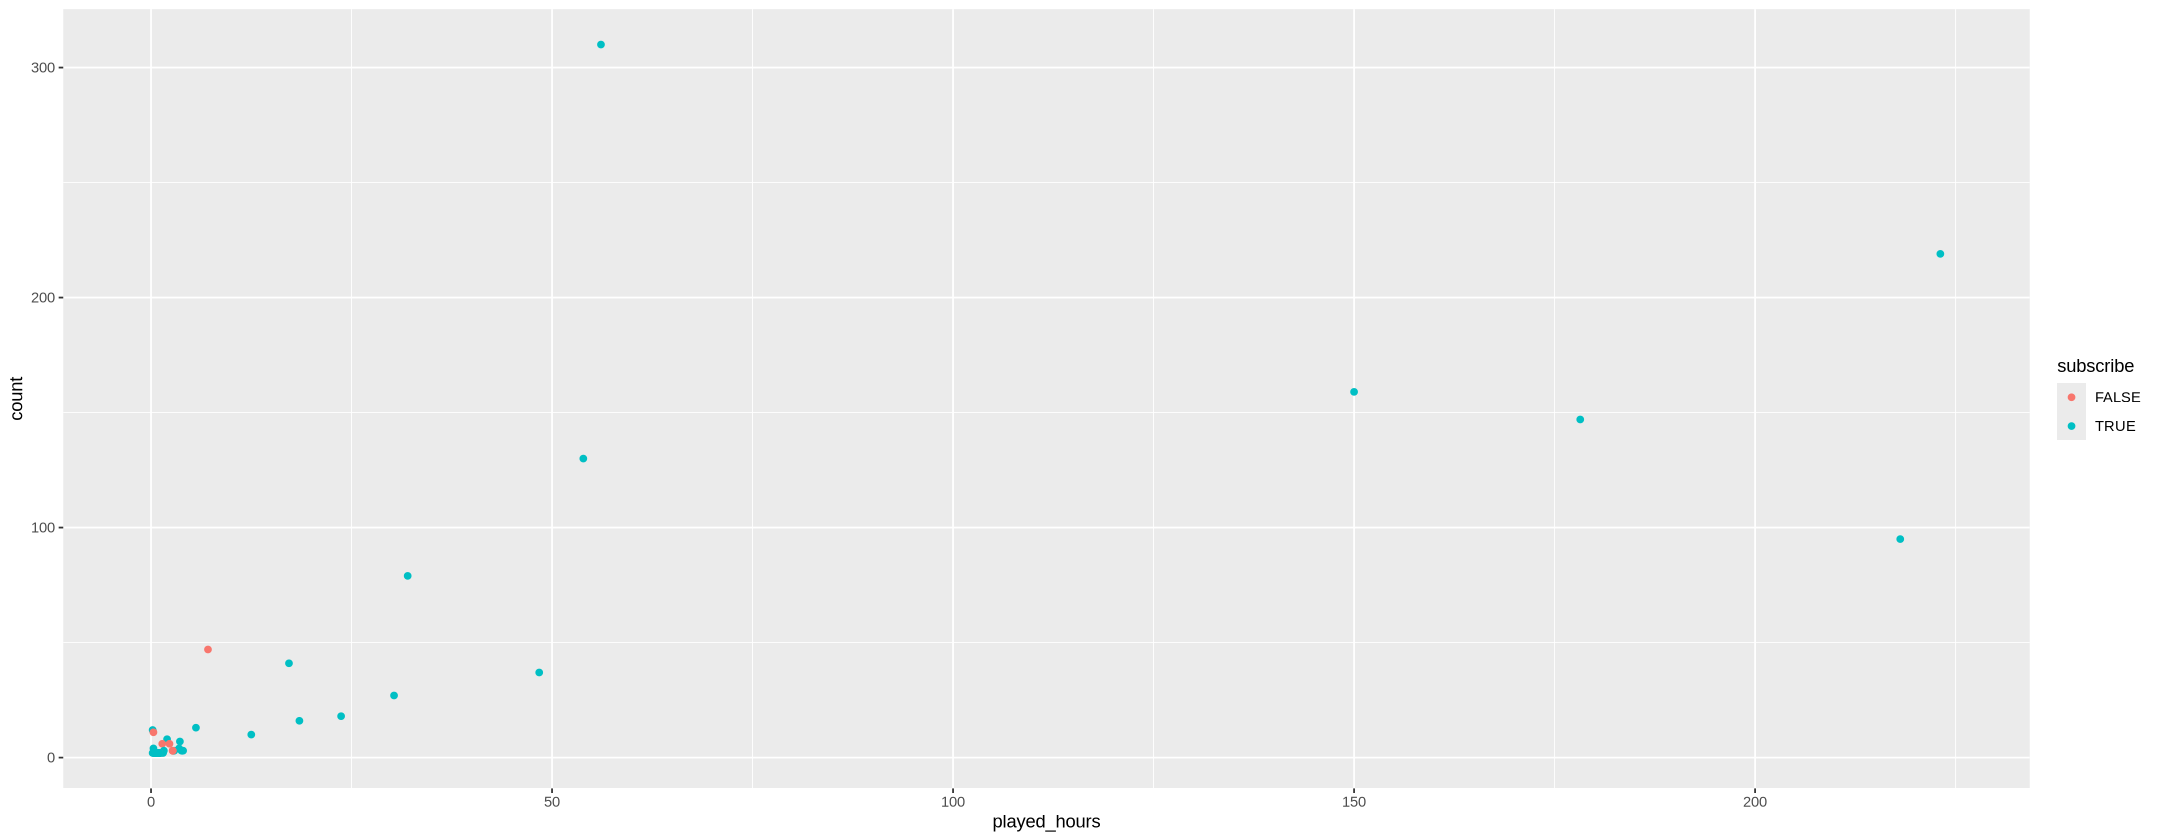

In [40]:
filtered_recurring_only <- final_data |>
    select(played_hours, count, subscribe) |>
    filter(count > 1)
filtered_recurring_only
recurring_plot <- ggplot(filtered_recurring_only, aes(x = played_hours, y = count, colour = subscribe)) +
    geom_point()
recurring_plot

# this did seem to get rid of some of the noise in the early areas, but unfortunately only 44 out of the 196 players remain.
# maybe we can consider analysing the proportion of recurring/one-time players that are subcribed?

hashedEmail,count,experience,subscribe,played_hours,name,gender,Age,player_type,player_type_truth
<chr>,<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,TRUE,56.1,Dana,Male,23,recurring,TRUE
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,Regular,TRUE,223.1,Hiroshi,Male,17,recurring,TRUE
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,Amateur,TRUE,150.0,Delara,Female,16,recurring,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,Pro,TRUE,1.2,Sakura,Male,17,onetime,TRUE
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,Amateur,TRUE,0.1,Fatima,Male,17,onetime,TRUE
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,Beginner,TRUE,1.1,Caden,Male,20,onetime,TRUE


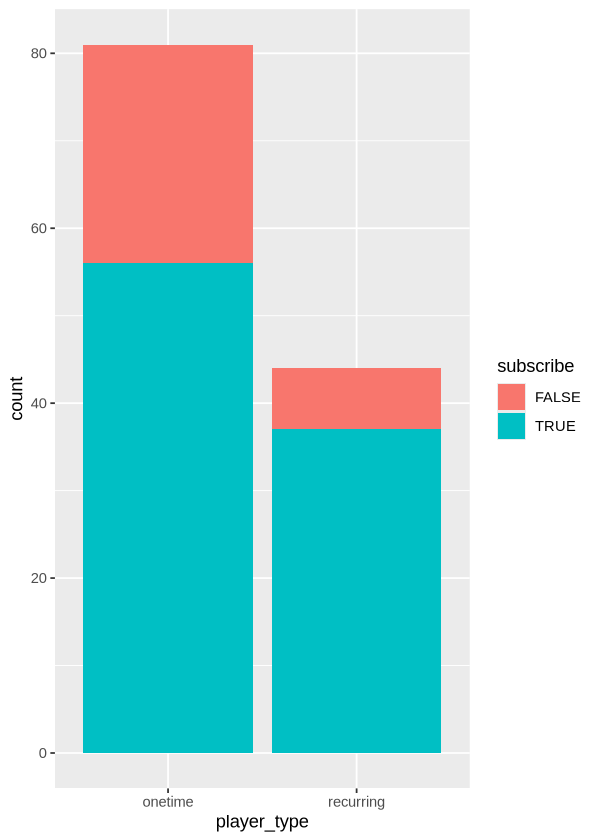

In [74]:
# here's a bar graph showing the proportion of subscribed players (one-time and recurring)
options(repr.plot.width = 5, repr.plot_height = 8)

onetime_vs_recurring_data <- final_data |>
    mutate(onetime = count == 1, recurring = count > 1) |>
    pivot_longer(cols = onetime:recurring, names_to = "player_type", values_to = "player_type_truth") |>
    group_by(player_type_truth) |> 
    filter(player_type_truth == "TRUE")
onetime_vs_recurring_data

# the above code makes a new column showing whether a player is recurring or a onetime player.
# the code also removed 71 players. These were individuals with NA as their count, and were therefore unable to be classified as recurring or onetime.

onetime_vs_recurring_plot <- ggplot(onetime_vs_recurring_data, aes(x = player_type, fill = subscribe)) +
    geom_bar(stat = "count")
onetime_vs_recurring_plot

# as you can see, recurring players ARE more likely to be subscribed. As you can tell by the higher proprtion of TRUE in recurring players.

## Discussion

* summary of findings
* discuss if results were expected
* impact of the findings
* further questions to ask

## References

* any format so long as its a consistent citation style

In [7]:
?boxplot

boxplot {graphics},R Documentation
formula,"a formula, such as y ~ grp, where y is a numeric vector of data values to be split into groups according to the grouping variable grp (usually a factor). Note that ~ g1 + g2 is equivalent to g1:g2."
data,a data.frame (or list) from which the variables in formula should be taken.
subset,an optional vector specifying a subset of observations to be used for plotting.
na.action,a function which indicates what should happen when the data contain NAs. The default is to ignore missing values in either the response or the group.
"xlab, ylab","x- and y-axis annotation, since R 3.6.0 with a non-empty default. Can be suppressed by ann=FALSE."
ann,logical indicating if axes should be annotated (by xlab and ylab).
"drop, sep, lex.order","passed to split.default, see there."
x,"for specifying data from which the boxplots are to be produced. Either a numeric vector, or a single list containing such vectors. Additional unnamed arguments specify further data as separate vectors (each corresponding to a component boxplot). NAs are allowed in the data."
...,"For the formula method, named arguments to be passed to the default method. For the default method, unnamed arguments are additional data vectors (unless x is a list when they are ignored), and named arguments are arguments and graphical parameters to be passed to bxp in addition to the ones given by argument pars (and override those in pars). Note that bxp may or may not make use of graphical parameters it is passed: see its documentation."
range,"this determines how far the plot whiskers extend out from the box. If range is positive, the whiskers extend to the most extreme data point which is no more than range times the interquartile range from the box. A value of zero causes the whiskers to extend to the data extremes."
